In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\LENOVO\Downloads\survey_lung_cancer.csv',header=0)

In [3]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [4]:
df=pd.get_dummies(df)

In [5]:
df.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_F,GENDER_M
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,0,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,0,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0,1,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0,0,1
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   AGE                    309 non-null    int64
 1   SMOKING                309 non-null    int64
 2   YELLOW_FINGERS         309 non-null    int64
 3   ANXIETY                309 non-null    int64
 4   PEER_PRESSURE          309 non-null    int64
 5   CHRONIC DISEASE        309 non-null    int64
 6   FATIGUE                309 non-null    int64
 7   ALLERGY                309 non-null    int64
 8   WHEEZING               309 non-null    int64
 9   ALCOHOL CONSUMING      309 non-null    int64
 10  COUGHING               309 non-null    int64
 11  SHORTNESS OF BREATH    309 non-null    int64
 12  SWALLOWING DIFFICULTY  309 non-null    int64
 13  CHEST PAIN             309 non-null    int64
 14  LUNG_CANCER            309 non-null    int64
 15  GENDER_F               309 non-null    u

In [7]:
del df['GENDER_F']

In [8]:
df.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_M
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0,1
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0,0


In [9]:
import statsmodels.api as sn

In [10]:
x =sn.add_constant(df['SMOKING'])

In [11]:
ln = sn.OLS(df['LUNG_CANCER'],x).fit()

In [12]:
ln.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            LUNG_CANCER   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.043
Date:                Fri, 02 Jun 2023   Prob (F-statistic):              0.308
Time:                        12:43:29   Log-Likelihood:                -97.302
No. Observations:                 309   AIC:                             198.6
Df Residuals:                     307   BIC:                             206.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8129      0.063     12.994      0.000       0.690       0.936
SMOKING        0.0390      0.038      1.021      0.308      -0.036       0.114
==============================================================================
Omnibus:                      138.874   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              377.891
Skew:                          -2.240   Prob(JB):                     8.75e-83
Kurtosis:                       6.047   Cond. No.                         7.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
y=df['LUNG_CANCER']

In [15]:
x=df[['SMOKING']]


In [16]:
ln2 = LinearRegression()

In [17]:
ln2.fit(x,y)

LinearRegression()

In [18]:
print(ln2.intercept_,ln2.coef_)

0.8128991060025542 [0.03895275]


In [19]:
ln2.predict(x)

array([0.85185185, 0.8908046 , 0.85185185, 0.8908046 , 0.85185185,
       0.85185185, 0.8908046 , 0.8908046 , 0.8908046 , 0.8908046 ,
       0.8908046 , 0.85185185, 0.8908046 , 0.8908046 , 0.8908046 ,
       0.85185185, 0.8908046 , 0.8908046 , 0.8908046 , 0.85185185,
       0.8908046 , 0.85185185, 0.8908046 , 0.8908046 , 0.8908046 ,
       0.85185185, 0.8908046 , 0.85185185, 0.8908046 , 0.85185185,
       0.8908046 , 0.8908046 , 0.8908046 , 0.8908046 , 0.85185185,
       0.8908046 , 0.85185185, 0.85185185, 0.8908046 , 0.8908046 ,
       0.8908046 , 0.85185185, 0.85185185, 0.8908046 , 0.8908046 ,
       0.8908046 , 0.8908046 , 0.8908046 , 0.85185185, 0.85185185,
       0.85185185, 0.8908046 , 0.8908046 , 0.8908046 , 0.85185185,
       0.85185185, 0.85185185, 0.85185185, 0.85185185, 0.8908046 ,
       0.85185185, 0.85185185, 0.85185185, 0.85185185, 0.85185185,
       0.8908046 , 0.85185185, 0.8908046 , 0.8908046 , 0.8908046 ,
       0.8908046 , 0.8908046 , 0.85185185, 0.8908046 , 0.89080

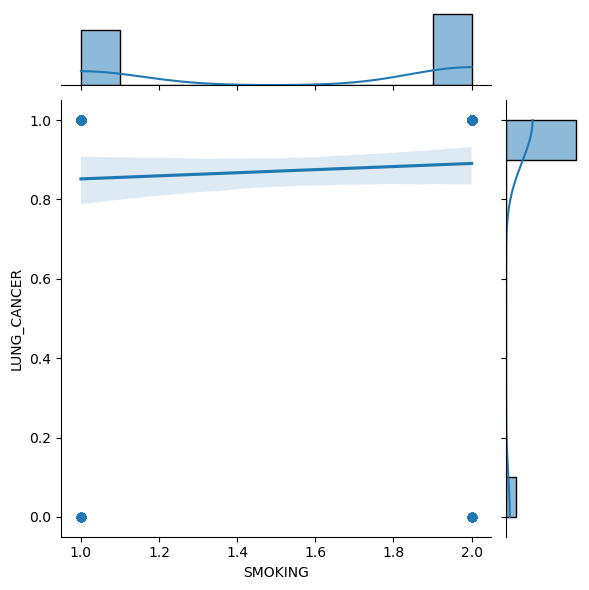

In [20]:
sns.jointplot(x=df['SMOKING'],y=df['LUNG_CANCER'],data=df,kind='reg')

In [21]:
x_multi=df.drop("LUNG_CANCER",axis=1)

In [22]:
x_multi.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,GENDER_M
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [23]:
y_multi=df['LUNG_CANCER']

In [24]:
y_multi.head()

0    1
1    1
2    0
3    0
4    0
Name: LUNG_CANCER, dtype: int64

In [25]:
x_multi_cons=sn.add_constant(x_multi)

In [26]:
x_multi_cons.head()

,const,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,GENDER_M
0,1.0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1.0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1.0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1.0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,1.0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [27]:
ln_multi=sn.OLS(y_multi,x_multi_cons).fit()

In [28]:
ln_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            LUNG_CANCER   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     13.01
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           7.00e-25
Time:                        12:43:30   Log-Likelihood:                -18.971
No. Observations:                 309   AIC:                             69.94
Df Residuals:                     293   BIC:                             129.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.2123      0.195     -6.231      0.000      -1.595      -0.829
AGE                       0.0014      0.002      0.756      0.450      -0.002       0.005
SMOKING                   0.0732      0.032      2.266      0.024       0.010       0.137
YELLOW_FINGERS            0.1198      0.041      2.940      0.004       0.040       0.200
ANXIETY                   0.0769      0.043      1.797      0.073      -0.007       0.161
PEER_PRESSURE             0.0882      0.036      2.434      0.016       0.017       0.160
CHRONIC DISEASE           0.0914      0.033      2.803      0.005       0.027       0.156
FATIGUE                   0.1503      0.039      3.885      0.000       0.074       0.226
ALLERGY                   0.1488      0.033      4.445      0.000       0.083       0.215
WHEEZING                  0.0600      0.035      1.711      0.088      -0.009       0.129
ALCOHOL CONSUMING         0.1942      0.040      4.858      0.000       0.116       0.273
COUGHING                  0.1058      0.038      2.785      0.006       0.031       0.181
SHORTNESS OF BREATH       0.0445      0.039      1.135      0.257      -0.033       0.122
SWALLOWING DIFFICULTY     0.0997      0.038      2.604      0.010       0.024       0.175
CHEST PAIN                0.0276      0.034      0.802      0.423      -0.040       0.095
GENDER_M                  0.0011      0.037      0.029      0.977      -0.072       0.074
==============================================================================
Omnibus:                       31.020   Durbin-Watson:                   1.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.103
Skew:                          -0.744   Prob(JB):                     3.23e-09
Kurtosis:                       3.908   Cond. No.                         829.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
ln3=LinearRegression()

In [30]:
ln3.fit(x_multi,y_multi)

LinearRegression()

In [31]:
print(ln3.intercept_,ln3.coef_)

-1.2123157998478722 [0.00142584 0.07321144 0.11975483 0.07688335 0.08823294 0.09143248
 0.15031483 0.14884071 0.06000699 0.19418246 0.10580074 0.04454605
 0.09966124 0.02763119 0.00107879]


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x_multi,y_multi,test_size=0.2,random_state=0)

In [34]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(247, 15) (62, 15) (247,) (62,)


In [35]:
ln_a= LinearRegression()

In [36]:
ln_a.fit(x_train,y_train)

LinearRegression()

In [37]:
y_test_a=ln_a.predict(x_test)

In [38]:
y_train_a=ln_a.predict(x_train)

In [39]:
from sklearn.metrics import r2_score

In [40]:
r2_score(y_train,y_train_a)

0.3790790963256525

In [41]:
r2_score(y_test,y_test_a)

0.3934695663951797

In [42]:
from sklearn import preprocessing

In [43]:
scaler=preprocessing.StandardScaler().fit(x_train)

In [44]:
x_test_s=scaler.transform(x_test)

In [45]:
x_train_s=scaler.transform(x_train)

In [46]:
from sklearn.linear_model import Ridge

In [47]:
ln_r=Ridge(alpha=0.5)
ln_r.fit(x_train_s,y_train)

Ridge(alpha=0.5)

In [48]:
r2_score(y_test,ln_r.predict(x_test_s))

0.39363166405705596

In [49]:
from sklearn.model_selection import validation_curve

In [50]:
param_range=np.logspace(-2,8,100)

In [51]:
param_range

array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8.30217568e-01,
       1.04761575e+00, 1.32194115e+00, 1.66810054e+00, 2.10490414e+00,
       2.65608778e+00, 3.35160265e+00, 4.22924287e+00, 5.33669923e+00,
       6.73415066e+00, 8.49753436e+00, 1.07226722e+01, 1.35304777e+01,
       1.70735265e+01, 2.15443469e+01, 2.71858824e+01, 3.43046929e+01,
       4.32876128e+01, 5.46227722e+01, 6.89261210e+01, 8.69749003e+01,
       1.09749877e+02, 1.38488637e+02, 1.74752840e+02, 2.20513074e+02,
       2.78255940e+02, 3.51119173e+02, 4.43062146e+02, 5.59081018e+02,
       7.05480231e+02, 8.90215085e+02, 1.12332403e+03, 1.41747416e+03,
       1.78864953e+03, 2.25701972e+03, 2.84803587e+03, 3.59381366e+03,
      

In [52]:
train_scores,test_scores=validation_curve(Ridge(),x_train_s,y_train,
                                         param_name="alpha",
                                         param_range=param_range,
                                         scoring="r2")

In [53]:
print(train_scores)
print(test_scores)

[[3.91288861e-01 3.40217036e-01 4.23755198e-01 3.88896335e-01
  4.11236854e-01]
 [3.91288861e-01 3.40217035e-01 4.23755198e-01 3.88896334e-01
  4.11236853e-01]
 [3.91288860e-01 3.40217034e-01 4.23755196e-01 3.88896333e-01
  4.11236852e-01]
 [3.91288859e-01 3.40217032e-01 4.23755194e-01 3.88896331e-01
  4.11236850e-01]
 [3.91288857e-01 3.40217030e-01 4.23755190e-01 3.88896329e-01
  4.11236846e-01]
 [3.91288854e-01 3.40217025e-01 4.23755185e-01 3.88896324e-01
  4.11236840e-01]
 [3.91288849e-01 3.40217017e-01 4.23755176e-01 3.88896318e-01
  4.11236831e-01]
 [3.91288841e-01 3.40217006e-01 4.23755162e-01 3.88896307e-01
  4.11236816e-01]
 [3.91288828e-01 3.40216987e-01 4.23755139e-01 3.88896290e-01
  4.11236793e-01]
 [3.91288807e-01 3.40216957e-01 4.23755103e-01 3.88896262e-01
  4.11236756e-01]
 [3.91288775e-01 3.40216910e-01 4.23755046e-01 3.88896219e-01
  4.11236696e-01]
 [3.91288724e-01 3.40216834e-01 4.23754954e-01 3.88896150e-01
  4.11236602e-01]
 [3.91288642e-01 3.40216714e-01 4.237548

In [54]:
train_mean=np.mean(train_scores,axis=1)

In [55]:
test_mean=np.mean(test_scores,axis=1)

In [56]:
train_mean

array([3.91078857e-01, 3.91078856e-01, 3.91078855e-01, 3.91078853e-01,
       3.91078850e-01, 3.91078846e-01, 3.91078838e-01, 3.91078826e-01,
       3.91078807e-01, 3.91078777e-01, 3.91078729e-01, 3.91078653e-01,
       3.91078531e-01, 3.91078338e-01, 3.91078031e-01, 3.91077542e-01,
       3.91076765e-01, 3.91075532e-01, 3.91073574e-01, 3.91070469e-01,
       3.91065550e-01, 3.91057767e-01, 3.91045470e-01, 3.91026085e-01,
       3.90995598e-01, 3.90947802e-01, 3.90873160e-01, 3.90757141e-01,
       3.90577853e-01, 3.90302744e-01, 3.89884177e-01, 3.89253779e-01,
       3.88315665e-01, 3.86938993e-01, 3.84950903e-01, 3.82131468e-01,
       3.78212942e-01, 3.72885852e-01, 3.65814255e-01, 3.56661655e-01,
       3.45127544e-01, 3.30992456e-01, 3.14166589e-01, 2.94733630e-01,
       2.72978544e-01, 2.49387908e-01, 2.24615932e-01, 1.99418591e-01,
       1.74568555e-01, 1.50770091e-01, 1.28592297e-01, 1.08431939e-01,
       9.05074438e-02, 7.48777279e-02, 6.14757524e-02, 5.01468565e-02,
      

In [57]:
max(train_mean)

0.3910788569718782

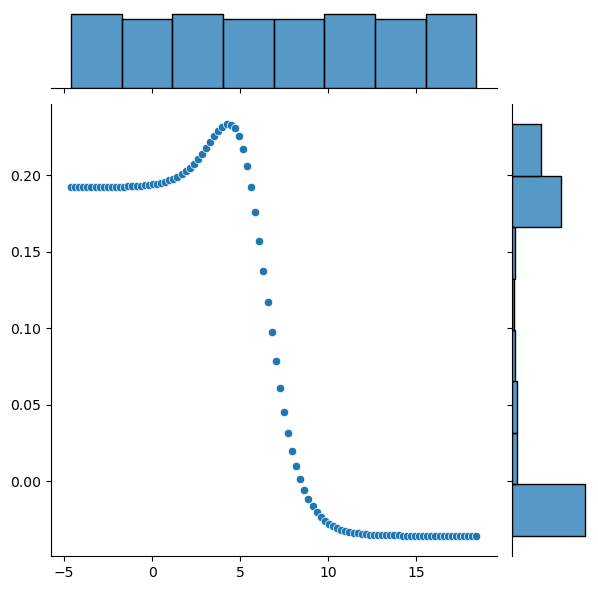

In [58]:
sns.jointplot(x=np.log(param_range),y=test_mean)

In [59]:
np.where(test_mean==max(test_mean))

(array([38], dtype=int64),)

In [60]:
param_range[38]

68.92612104349695

In [61]:
ln_r_best=Ridge(alpha=param_range[38])

In [62]:
ln_r_best.fit(x_train_s,y_train)

Ridge(alpha=68.92612104349695)

In [63]:
r2_score(y_test,ln_r_best.predict(x_test_s))

0.38654538451015896

In [64]:
r2_score(y_train,ln_r_best.predict(x_train_s))

0.3615722292306406

In [65]:
from sklearn.linear_model import Lasso

In [66]:
ln_l=Lasso(alpha=0.4)

In [67]:
x=df[['SMOKING']]

In [68]:
x=df.loc[:,df.columns!='LUNG_CANCER']

In [69]:
y=df['LUNG_CANCER']

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
clf_lr=LogisticRegression()

In [72]:
clf_lr.fit(x,y)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [73]:
clf_lr.coef_

array([[ 0.02172291,  0.88250738,  1.00999136,  0.61780514,  1.10664229,
         1.52654207,  1.55302097,  1.32653351,  0.66609031,  1.26004241,
         1.52180597, -0.00876269,  1.37793422,  0.41742025, -0.24314511]])

In [74]:
clf_lr.intercept_

array([-18.47026138])

In [75]:
x_cons=sn.add_constant(x)

In [76]:
x_cons.head()

,const,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,GENDER_M
0,1.0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1.0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1.0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1.0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,1.0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [77]:
import statsmodels.discrete.discrete_model as sm

In [78]:
logit=sm.Logit(y,x).fit()

Optimization terminated successfully.
         Current function value: 0.258351
         Iterations 8


In [79]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            LUNG_CANCER   No. Observations:                  309
Model:                          Logit   Df Residuals:                      294
Method:                           MLE   Df Model:                           14
Date:                Fri, 02 Jun 2023   Pseudo R-squ.:                  0.3186
Time:                        12:43:32   Log-Likelihood:                -79.830
converged:                       True   LL-Null:                       -117.15
Covariance Type:            nonrobust   LLR p-value:                 2.756e-10
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
AGE                      -0.1193      0.029     -4.082      0.000      -0.177      -0.062
SMOKING                  -0.1344      0.450     -0.299      0.765      -1.016       0.748
YELLOW_FINGERS            0.2809      0.545      0.516      0.606      -0.786       1.348
ANXIETY                  -0.0588      0.584     -0.101      0.920      -1.203       1.086
PEER_PRESSURE             0.6660      0.476      1.400      0.161      -0.266       1.598
CHRONIC DISEASE           0.5263      0.476      1.107      0.268      -0.406       1.458
FATIGUE                   1.0503      0.502      2.091      0.037       0.066       2.035
ALLERGY                   1.6880      0.540      3.125      0.002       0.629       2.747
WHEEZING                  0.4213      0.536      0.786      0.432      -0.629       1.472
ALCOHOL CONSUMING         0.9654      0.557      1.733      0.083      -0.127       2.057
COUGHING                  1.1750      0.619      1.898      0.058      -0.039       2.389
SHORTNESS OF BREATH      -0.8807      0.578     -1.524      0.128      -2.014       0.252
SWALLOWING DIFFICULTY     1.4471      0.595      2.432      0.015       0.281       2.613
CHEST PAIN               -0.1917      0.480     -0.399      0.690      -1.133       0.750
GENDER_M                 -0.3800      0.510     -0.745      0.456      -1.380       0.620
=========================================================================================
"""

In [80]:
clf_lr.predict_proba(x)

array([[1.14483456e-02, 9.88551654e-01],
       [3.81674245e-02, 9.61832576e-01],
       [2.09957635e-01, 7.90042365e-01],
       [1.85667548e-01, 8.14332452e-01],
       [6.58140745e-01, 3.41859255e-01],
       [1.77798125e-02, 9.82220188e-01],
       [1.22831803e-01, 8.77168197e-01],
       [2.27349933e-02, 9.77265007e-01],
       [6.64228777e-01, 3.35771223e-01],
       [5.37343635e-03, 9.94626564e-01],
       [1.71609467e-03, 9.98283905e-01],
       [1.24819734e-02, 9.87518027e-01],
       [8.14957091e-01, 1.85042909e-01],
       [3.15918705e-02, 9.68408129e-01],
       [1.07412541e-01, 8.92587459e-01],
       [1.46035428e-03, 9.98539646e-01],
       [2.26305399e-02, 9.77369460e-01],
       [1.83202545e-02, 9.81679745e-01],
       [1.12728369e-02, 9.88727163e-01],
       [6.93554547e-01, 3.06445453e-01],
       [2.16937040e-02, 9.78306296e-01],
       [2.17877014e-02, 9.78212299e-01],
       [3.72072912e-01, 6.27927088e-01],
       [3.02894070e-02, 9.69710593e-01],
       [4.008463

In [81]:
y_pred =clf_lr.predict(x)

In [82]:
y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [83]:
y_pred_03=(clf_lr.predict_proba(x)[:,1]>0.3)

In [84]:
y_pred_03

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [85]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,y_pred)

array([[ 26,  13],
       [  6, 264]], dtype=int64)

In [86]:
confusion_matrix(y,y_pred_03)

array([[  8,  31],
       [  3, 267]], dtype=int64)

In [87]:
from sklearn.metrics import precision_score,recall_score

In [88]:
precision_score(y,y_pred)

0.9530685920577617

In [89]:
recall_score(y,y_pred)

0.9777777777777777

In [90]:
from sklearn.metrics import roc_auc_score

In [91]:
roc_auc_score(y,y_pred)

0.8222222222222223

In [92]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [93]:
clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(x,y)

LinearDiscriminantAnalysis()

In [94]:
y_pred_lda= clf_lda.predict(x)

In [95]:
confusion_matrix(y,y_pred_lda)

array([[ 28,  11],
       [  9, 261]], dtype=int64)

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x_multi,y_multi,test_size=0.2,random_state=0)

In [98]:
print(x_train.shape,x_test.shape,y_test.shape,y_train.shape)

(247, 15) (62, 15) (62,) (247,)


In [99]:
ln_a=LinearRegression()

In [100]:
ln_a.fit(x_train,y_train)

LinearRegression()

In [101]:
y_test_a=ln_a.predict(x_test)

In [102]:
y_train_a=ln_a.predict(x_train)

In [103]:
from sklearn.metrics import r2_score

In [104]:
r2_score(y_test,y_test_a)

0.3934695663951797

In [105]:
r2_score(y_train,y_train_a)

0.3790790963256525

In [124]:
x_train_z

array([[-1.48758009,  0.88146379,  0.85990501, ...,  1.06269015,
        -1.12519112, -1.02875329],
       [ 1.14051184,  0.88146379,  0.85990501, ...,  1.06269015,
         0.88873791,  0.97205035],
       [-0.48640221,  0.88146379, -1.16291915, ..., -0.94100807,
        -1.12519112,  0.97205035],
       ...,
       [-1.48758009,  0.88146379,  0.85990501, ...,  1.06269015,
        -1.12519112, -1.02875329],
       [ 0.13933397,  0.88146379,  0.85990501, ...,  1.06269015,
         0.88873791, -1.02875329],
       [-0.86184391, -1.13447655,  0.85990501, ..., -0.94100807,
        -1.12519112,  0.97205035]])

In [107]:
from sklearn import preprocessing


In [108]:
from sklearn.preprocessing import StandardScaler

In [109]:
scaler=preprocessing.StandardScaler().fit(x_train)
x_train_z=scaler.transform(x_train)

In [110]:
scaler=preprocessing.StandardScaler().fit(x_test)
x_test_z=scaler.transform(x_test)

In [125]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn_1=KNeighborsClassifier(n_neighbors=3 )
clf_knn_1.fit(x_train_z,y_train)



KNeighborsClassifier(n_neighbors=3)

In [126]:
confusion_matrix(y_test,clf_knn_1.predict(x_test_z))

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([[ 4,  6],
       [ 1, 51]], dtype=int64)

In [127]:
from sklearn.metrics import accuracy_score


In [128]:
accuracy_score(y_test, clf_knn_1.predict(x_test_z))

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8870967741935484

In [129]:
from sklearn.model_selection import GridSearchCV

In [130]:
params={'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}

In [131]:
grid_search_cv = GridSearchCV(KNeighborsClassifier(),params)

In [132]:
grid_search_cv.fit(x_train_z,y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [133]:
grid_search_cv.best_params_

{'n_neighbors': 8}

In [134]:
optimised_KNN=grid_search_cv.best_estimator_

In [136]:
y_test_pred=optimised_KNN.predict(x_test_z)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [137]:
confusion_matrix(y_test,y_test_pred)

array([[ 5,  5],
       [ 1, 51]], dtype=int64)

In [138]:
accuracy_score(y_test,y_test_pred)

0.9032258064516129